In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import subgraph_sampler as ss
from tqdm import tqdm

In [3]:
def heat_kernel(G,t):
    e_values = nx.laplacian_spectrum(G)
    np.delete(e_values, 0)
    exp = [np.exp((-e_value)*t) for e_value in e_values]
    return np.sum(exp)


def subgraph_cut_size(G,S):
    # Adding supernode:
    
    nodes_1 = {node for node in S.nodes}
    nodes_0 = {node for node in G.nodes if node not in S.nodes}
    k = nx.cut_size(G,nodes_1,nodes_0)
    return k

In [35]:
n = 200
size = 100
grid = nx.triangular_lattice_graph(n,n)

t= 0.0001
PP_list = []
HK_list = []

iterations = 100
for i in tqdm(range(iterations)):
    S = ss.connected_subgraph_sampler(grid,size= size)
    
    HK_list.append(heat_kernel(S,t))
    
    # Adding supernode & connecting it for correct perimeter calculation
    grid.add_edges_from([((-1,-1),node) for node in grid.nodes if nx.degree(grid,node) < 6])

    PP_list.append(subgraph_cut_size(grid,S)**2/len(S.nodes))
    
    # Removing supernode for correct sampling
    grid.remove_node((-1,-1))



100%|██████████| 100/100 [00:25<00:00,  4.00it/s]


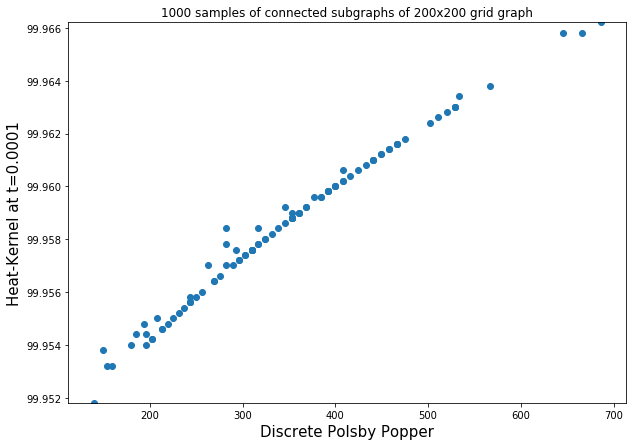

In [36]:
plt.figure(figsize = (10,7))
plt.ylabel("Heat-Kernel at t="+str(t), fontsize = 15)
plt.xlabel("Discrete Polsby Popper", fontsize = 15)
plt.title("1000 samples of connected subgraphs of " +str(n)+"x"+str(n)+" grid graph")
plt.ylim((min(HK_list), max(HK_list)))   # set the ylim to ymin, ymax
plt.scatter(PP_list,HK_list)

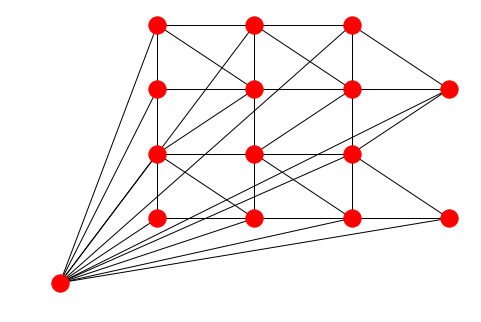

In [30]:
graph = nx.triangular_lattice_graph(3,5)
pos = {i:i for i in graph.nodes()}
pos[(-1,-1)] = (-1,-1)
graph.add_edges_from([((-1,-1),node) for node in graph.nodes if nx.degree(graph,node) < 6])
nx.draw(graph, pos = pos)
